In [3]:
import dabl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
train = pd.read_csv('C:\\kaggle\\ai_challenge\\pretest\\따릉이(회귀)\\data/2020.AI.bike-train.csv')
test = pd.read_csv('C:\\kaggle\\ai_challenge\\pretest\\따릉이(회귀)/data/2020.AI.bike-test.csv')

In [25]:
dr_clean = dabl.clean(train, verbose=0)

In [26]:
dr_clea

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
995,1647,14,20.4,3.6,12.0,2000.0,0.047,23.0,13.0,108.0
996,1649,15,18.5,4.1,24.0,849.0,0.064,92.0,83.0,78.0
997,1650,4,16.1,0.6,60.0,2000.0,0.028,39.0,28.0,27.0
998,1652,16,17.7,2.3,32.0,1949.0,0.037,64.0,22.0,118.0


In [9]:
display(train.head())
display(train.tail())

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
995,1647,14,20.4,0.0,3.6,12.0,2000.0,0.047,23.0,13.0,108.0
996,1649,15,18.5,0.0,4.1,24.0,849.0,0.064,92.0,83.0,78.0
997,1650,4,16.1,0.0,0.6,60.0,2000.0,0.028,39.0,28.0,27.0
998,1652,16,17.7,0.0,2.3,32.0,1949.0,0.037,64.0,22.0,118.0
999,1653,6,10.7,0.0,2.5,99.0,78.0,0.034,32.0,28.0,5.0


In [21]:
train = train.drop('id',axis=1)

In [10]:
trn = train.drop('id',axis=1)

In [12]:
y = trn.pop('count')

In [13]:
trn

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...
995,14,20.4,0.0,3.6,12.0,2000.0,0.047,23.0,13.0
996,15,18.5,0.0,4.1,24.0,849.0,0.064,92.0,83.0
997,4,16.1,0.0,0.6,60.0,2000.0,0.028,39.0,28.0
998,16,17.7,0.0,2.3,32.0,1949.0,0.037,64.0,22.0


In [14]:
y

0       49.0
1      159.0
2       26.0
3       57.0
4      431.0
       ...  
995    108.0
996     78.0
997     27.0
998    118.0
999      5.0
Name: count, Length: 1000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(trn, y, random_state=1)
sc = dabl.SimpleClassifier().fit(X_train, y_train)
print("Accuracy score", sc.score(X_test, y_test))

Running DummyClassifier(strategy='prior')
accuracy: 0.016 recall_macro: 0.007 precision_macro: 0.000 f1_macro: 0.000
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.016 recall_macro: 0.007 precision_macro: 0.000 f1_macro: 0.000

Running GaussianNB()
accuracy: 0.020 recall_macro: 0.016 precision_macro: 0.009 f1_macro: 0.010
=== new best GaussianNB() (using recall_macro):
accuracy: 0.020 recall_macro: 0.016 precision_macro: 0.009 f1_macro: 0.010

Running MultinomialNB()
accuracy: 0.021 recall_macro: 0.015 precision_macro: 0.002 f1_macro: 0.004
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.011 recall_macro: 0.007 precision_macro: 0.000 f1_macro: 0.000
Running DecisionTreeClassifier(class_weight='balanced', max_depth=265)
accuracy: 0.012 recall_macro: 0.010 precision_macro: 0.006 f1_macro: 0.007
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.011 recall_macro: 0.007 precision

Target looks like regression


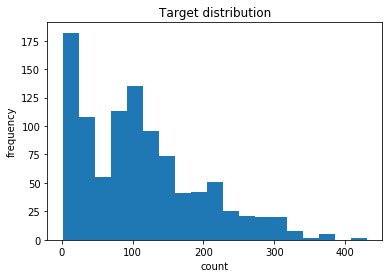

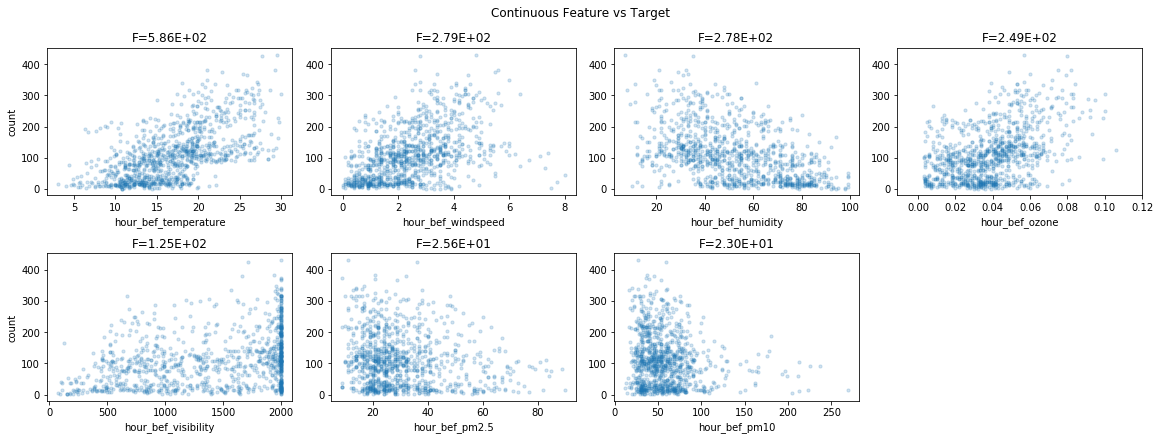

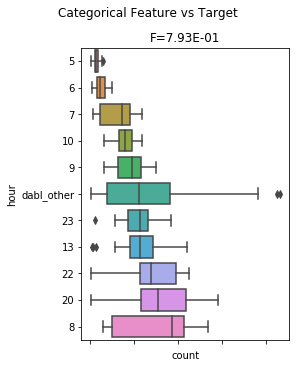

In [19]:
dabl.plot(trn, y)

Target looks like regression


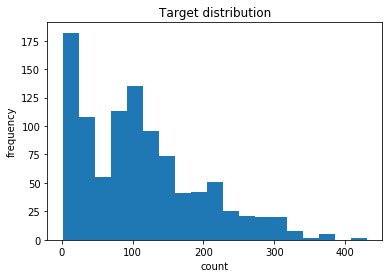

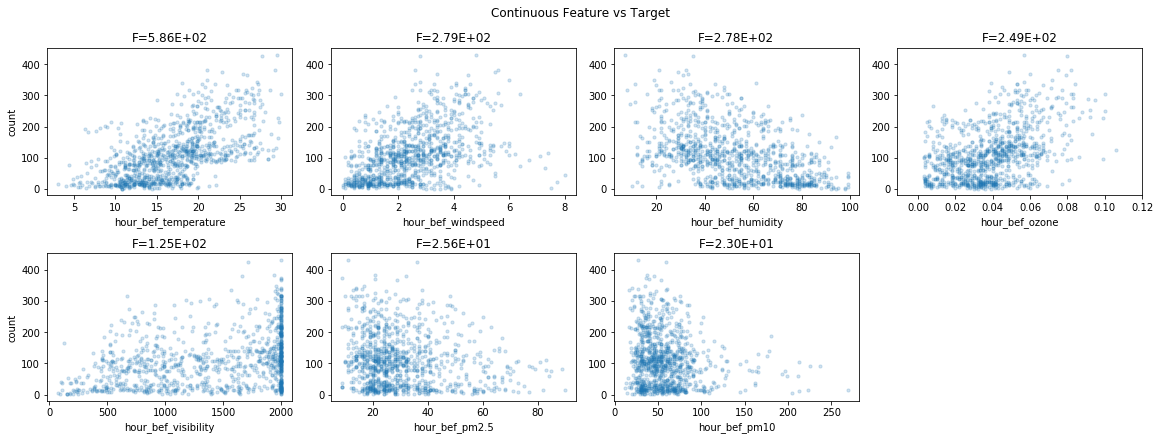

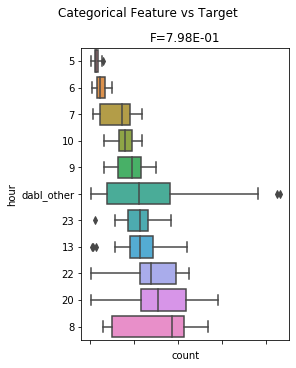

In [23]:
dabl.plot(train, target_col="count")